In [34]:
import pandas as pd

df = pd.read_csv('resources/train.csv')

# Exploratory Data Analysis

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

There are 81 columns in the dataset and the dataset contains 1460 rows. The label is SalePrice

There's no doublon in the dataset but a lot of NA values.

The columns with many missing values are: PoolQC(NA => No Pool), Fence(NA => No Fence), MiscFeature, MasVnrType, Alley (around 50% of missing values)

The columns that seems to be useless are: Id, YrSold, PoolArea, Utilities, LandContour, Street, LandSlope, LotConfig(pas sûr)

# Data Preprocessing and encoding

In [36]:
df = df[df['SalePrice'] <= 400000]

In [37]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import pandas as pd

# Selecting features
selected_features_winner = ['GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt', 'FullBath', 'TotRmsAbvGrd',
                            'YearRemodAdd',
                            'GarageArea', 'LotArea', 'OverallCond', 'OverallQual', 'Neighborhood', 'KitchenQual',
                            'ExterQual',
                            'GarageCars', 'Foundation', 'BsmtQual', 'RoofStyle', 'BsmtExposure', 'SalePrice']

selected_features = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
                     'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice',
                     'LotFrontage', 'LotArea', 'LotShape', 'BsmtFinSF1', 'BsmtUnfSF', '2ndFlrSF', 'BsmtFullBath',
                     'HalfBath', 'BedroomAbvGr', 'FireplaceQu', 'WoodDeckSF', 'OpenPorchSF', 'Neighborhood',
                     'Foundation', 'BsmtQual', 'KitchenQual', 'BsmtExposure', 'ExterQual']

# Subsetting dataframe
df = df[selected_features]

# Filling missing values
# df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
# df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())
# df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())
# df['BsmtFinSF1'] = df['BsmtFinSF1'].fillna(df['BsmtFinSF1'].median())
# df['BsmtUnfSF'] = df['BsmtUnfSF'].fillna(df['BsmtUnfSF'].mean())
# df['2ndFlrSF'] = df['2ndFlrSF'].fillna(df['2ndFlrSF'].mean())
# df['BsmtFullBath'] = df['BsmtFullBath'].fillna(df['BsmtFullBath'].mean())
# df['HalfBath'] = df['HalfBath'].fillna(df['HalfBath'].mean())
# df['FireplaceQu'] = df['FireplaceQu'].fillna('No')
# df['BsmtQual'] = df['BsmtQual'].fillna('No')
# df['BsmtExposure'] = df['BsmtExposure'].fillna('None')

df_num = df.select_dtypes(include=['float64', 'int64'])
for colonne in df_num.columns:
    df[colonne] = df[colonne].fillna(df[colonne].mean())

# Filling missing String object values
df_obj = df.select_dtypes(include=['object'])
for colonne in df_obj.columns:
    df[colonne] = df[colonne].fillna('NONE')


print(df.isna().sum().nlargest(80))

# Separating target variable
X = df.drop(columns='SalePrice')
y = df['SalePrice']

# One-hot encoding categorical features
one_hot_encoder = OneHotEncoder()
X_encoded = one_hot_encoder.fit_transform(X.select_dtypes(include=['object', 'int64', 'float64']))

# Scaling numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.select_dtypes(exclude=['object']))

# Concatenating encoded categorical features and scaled numerical features
X_preprocessed = pd.concat([pd.DataFrame(X_encoded.toarray()), pd.DataFrame(X_scaled)], axis=1)

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.1, random_state=42)


OverallQual     0
YearBuilt       0
BsmtExposure    0
KitchenQual     0
BsmtQual        0
Foundation      0
Neighborhood    0
OpenPorchSF     0
WoodDeckSF      0
FireplaceQu     0
BedroomAbvGr    0
HalfBath        0
BsmtFullBath    0
2ndFlrSF        0
BsmtUnfSF       0
BsmtFinSF1      0
LotShape        0
LotArea         0
LotFrontage     0
SalePrice       0
GarageArea      0
GarageCars      0
GarageYrBlt     0
Fireplaces      0
TotRmsAbvGrd    0
FullBath        0
GrLivArea       0
1stFlrSF        0
TotalBsmtSF     0
MasVnrArea      0
YearRemodAdd    0
ExterQual       0
dtype: int64


# Training the model

In [38]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

# Initialize the model -> Lasso is the most effective
model_lasso = Lasso(max_iter=30000)
model_rfg = RandomForestRegressor(random_state=42)

# Train the model
model_lasso.fit(X_train, y_train)
model_rfg.fit(X_train, y_train)

# Retrieve the model's predictions
y_pred_lasso = model_lasso.predict(X_test)
y_pred_rfg = model_rfg.predict(X_test)

y_pred = (y_pred_lasso + y_pred_rfg) / 2

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score, \
    mean_squared_log_error, root_mean_squared_log_error
import numpy as np

mae = mean_absolute_error(y_test, y_pred)

mape = mean_absolute_percentage_error(y_test, y_pred)

mape_percentage = np.abs((y_test - y_pred) / y_test).mean() * 100

msle = mean_squared_log_error(y_test, y_pred)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_percentage = (rmse / y_test.mean()) * 100

r2 = r2_score(y_test, y_pred)

rmsle = root_mean_squared_log_error(y_test, y_pred)

print("Erreur absolue moyenne (MAE):", mae)
print("Erreur absolue moyenne en pourcentage (MAPE):", mape)
print("MAPE en pourcentage:", mape_percentage)

print("Erreur quadratique moyenne (RMSE):", rmse)
print("RMSE en pourcentage:", rmse_percentage)

print("Erreur quadratique moyenne logarithmique (MSLE):", msle)

print("Coefficient de détermination (R2):", r2)
print("Pourcentage de précision:", r2 * 100)

print('RMSLE : ', rmsle)

Erreur absolue moyenne (MAE): 15505.591028315976
Erreur absolue moyenne en pourcentage (MAPE): 0.08807177801227965
MAPE en pourcentage: 8.807177801227965
Erreur quadratique moyenne (RMSE): 22056.900741248828
RMSE en pourcentage: 12.244958984355826
Erreur quadratique moyenne logarithmique (MSLE): 0.014760211392563597
Coefficient de détermination (R2): 0.8948745200858627
Pourcentage de précision: 89.48745200858626
RMSLE :  0.12149161037933276


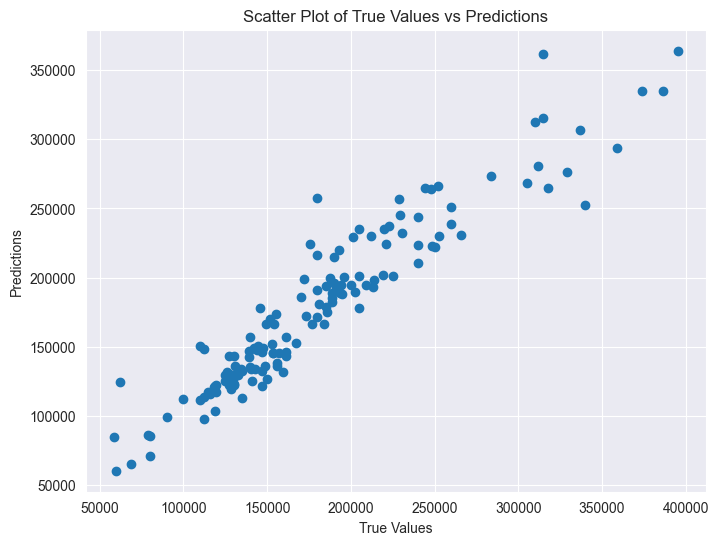

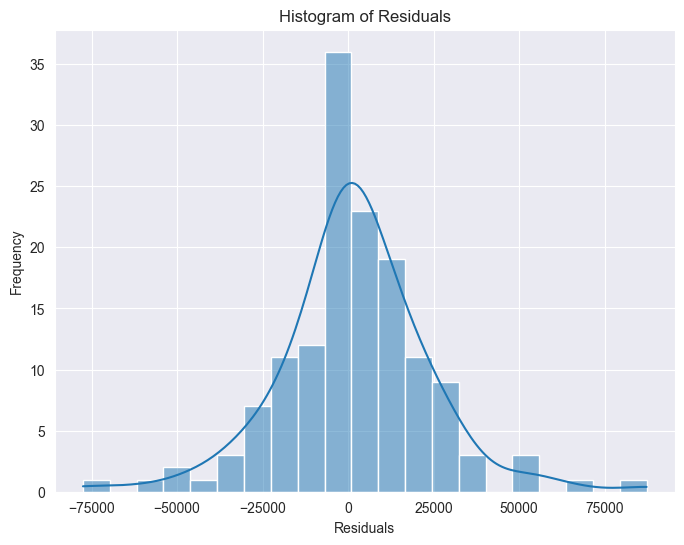

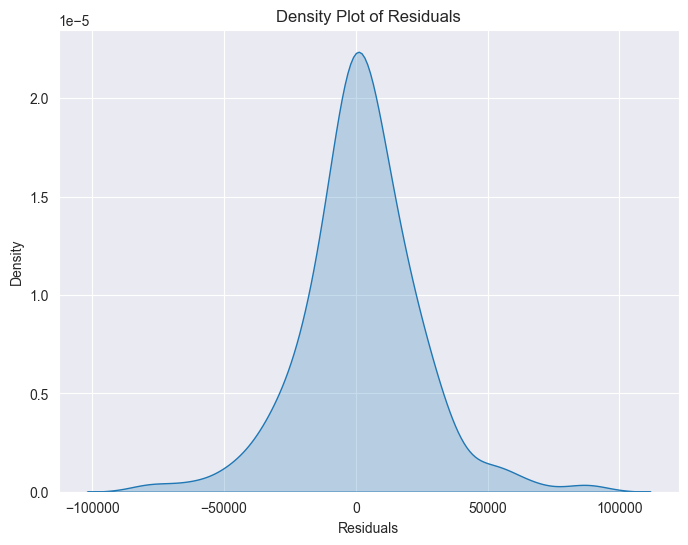

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot des prédictions par rapport aux vraies valeurs
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Scatter Plot of True Values vs Predictions')
plt.show()

# Histogramme des résidus
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# Courbe de densité des résidus
plt.figure(figsize=(8, 6))
sns.kdeplot(residuals, fill=True)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Density Plot of Residuals')
plt.show()

In [41]:
# Pourcentage d'écart moyen
diff = np.abs(y_test - y_pred)

# Calculer l'écart moyen
ecart_moyen = np.mean(diff)

max_ecart = np.max(diff)
min_ecart = np.min(diff)

# Calculer la moyenne de y_val
moyenne_y_val = np.mean(y_test)

# Convertir l'écart moyen en pourcentage d'écart moyen
ecart_moyen_pct = (ecart_moyen / moyenne_y_val) * 100

print("Pourcentage d'écart moyen:", ecart_moyen_pct, "%")
print("Plus gros écart constaté :", max_ecart, "€")
print("Plus petit écart constaté :", min_ecart, "€")

Pourcentage d'écart moyen: 8.60797844616745 %
Plus gros écart constaté : 87271.16193179507 €
Plus petit écart constaté : 4.403166067233542 €
